In [352]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy.random as rnd
pd.options.display.float_format = '{:,.3f}'.format

In [328]:
Km = 1.4e-5 # Molar
Vmax = 3.2e-5 # 20 umol / seg
tmax = 1.5 # seg
dt = 10 #
a = 10.0e-6 # Molar
#a = Km # Molar
t = np.arange(0,tmax+0.1,0.1)
std_dev = 0.03

In [330]:
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5])

In [349]:
# create an empy pandas data frame with the
# npoint lines and nrepl+1 columns
#
columns = ['[A]']
columns = columns + ['t='+str(i)+'s' for i in range(len(t))]
enz_data = pd.DataFrame(np.zeros((0, len(t)+1)),columns=columns)
#enz_data.loc['0']=
enz_data.loc[0] = range(17)
enz_data

,[A],t=0s,t=1s,t=2s,t=3s,t=4s,t=5s,t=6s,t=7s,t=8s,t=9s,t=10s,t=11s,t=12s,t=13s,t=14s,t=15s
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0


In [341]:
# Integrated form of Michaelis-Menten equation
def int_mm(x,a,t,vmax,km):
    return x+km*(np.log(a)-np.log((a-x)))-vmax*t

In [353]:
course = []
for tt in t:
    b = fsolve(int_mm, 1.8e-10,args=(a,tt,Vmax,Km),xtol=1e-10)
    print("{:5.2f} {:5.2e} {:5.2f}".format(tt,b[0],b[0]/a))
    err = rnd.normal(0,std_dev*b[0])
    course.append(b[0]+err)
x = [a]
x = [a]+[s for s in course]
enz_data.loc[0]=x
enz_data

 0.00 0.00e+00  0.00
 0.10 1.28e-06  0.13
 0.20 2.46e-06  0.25
 0.30 3.52e-06  0.35
 0.40 4.48e-06  0.45
 0.50 5.33e-06  0.53
 0.60 6.08e-06  0.61
 0.70 6.73e-06  0.67
 0.80 7.30e-06  0.73
 0.90 7.77e-06  0.78
 1.00 8.18e-06  0.82
 1.10 8.51e-06  0.85
 1.20 8.79e-06  0.88
 1.30 9.02e-06  0.90
 1.40 9.21e-06  0.92
 1.50 9.37e-06  0.94


,[A],t=0s,t=1s,t=2s,t=3s,t=4s,t=5s,t=6s,t=7s,t=8s,t=9s,t=10s,t=11s,t=12s,t=13s,t=14s,t=15s
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [285]:
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5])

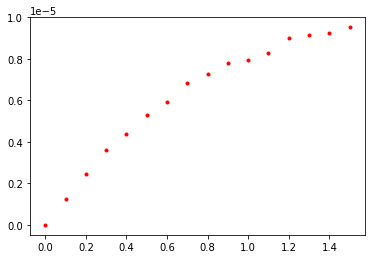

In [286]:
plt.plot(t,course,'r.')

In [295]:
#fitting on the n first points
N = 2
m, b,r,_,_ = linregress(t[:N],course[:N])
m,b,r

(1.2491466103103646e-05, 1.0587911840678754e-22, 1.0)

In [293]:
Vmax*a/(Km+a)

1.3333333333333335e-05

In [290]:
Km, Vmax, a

(1.4e-05, 3.2e-05, 1e-05)